In [ ]:
pip install tensorflow tensorflow-hub matplotlib pillow numpy

Loading content and style images...


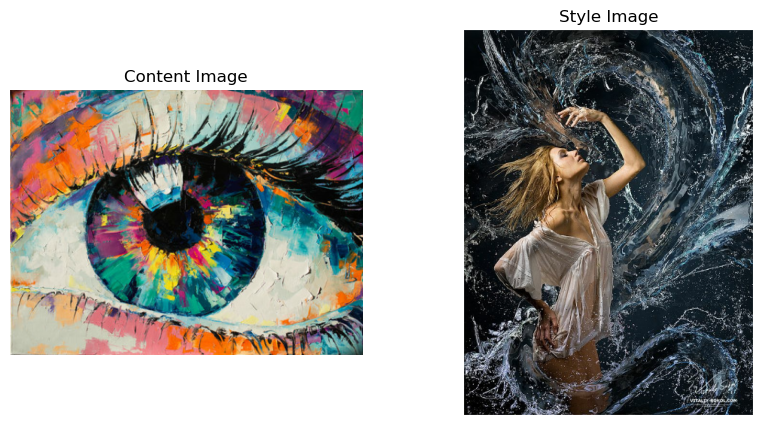

Loading pre-trained style transfer model from TensorFlow Hub...



Applying artistic style...
Saving and displaying the stylized image...


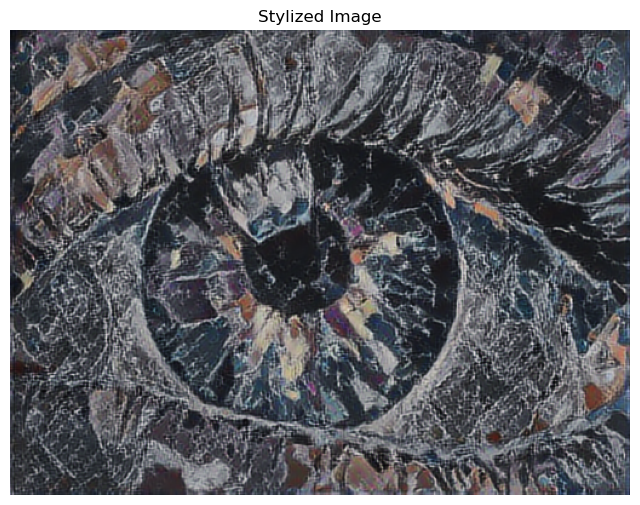

Stylized image saved to: stylized_output.jpg
Neural style transfer complete!


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# --- Configuration ---
CONTENT_IMAGE_PATH = 'C:/Users/admin/Downloads/1.jpg' 
STYLE_IMAGE_PATH = 'C:/Users/admin/Downloads/2.jpg'     
OUTPUT_IMAGE_PATH = 'stylized_output.jpg'

# Desired image size for processing (helps with memory and speed)
IMAGE_SIZE = 512 # You can adjust this

# --- Helper Functions ---

def load_img(path_to_img):
    """Loads an image and resizes it."""
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = IMAGE_SIZE / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def tensor_to_image(tensor):
    """Converts a TensorFlow tensor to a PIL Image."""
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

def imshow(image, title=None):
    """Displays an image."""
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

# --- Main Style Transfer Logic ---

if __name__ == "__main__":
    print("Loading content and style images...")
    content_image = load_img(CONTENT_IMAGE_PATH)
    style_image = load_img(STYLE_IMAGE_PATH)

    # Display original images (optional)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    imshow(content_image, 'Content Image')
    plt.subplot(1, 2, 2)
    imshow(style_image, 'Style Image')
    plt.show()

    print("Loading pre-trained style transfer model from TensorFlow Hub...")
    # This specific model is a fast style transfer model.
    # For more control or custom implementation, you might use a VGG-based approach.
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

    print("Applying artistic style...")
    # The model expects style image first, then content image
    stylized_image_tensor = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    print("Saving and displaying the stylized image...")
    stylized_image_pil = tensor_to_image(stylized_image_tensor)
    stylized_image_pil.save(OUTPUT_IMAGE_PATH)

    plt.figure(figsize=(8, 8))
    imshow(stylized_image_tensor, 'Stylized Image')
    plt.show()

    print(f"Stylized image saved to: {OUTPUT_IMAGE_PATH}")
    print("Neural style transfer complete!")